# IE 529 Computational Assignment 1

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

## Part 1. Regression Analysis

In [2]:
# load the data set
data1 = pd.read_csv('./data/Comp1_IE529_data1.csv', header=None).values
x = data1[:, 0]
y = data1[:, 1]

### Polynomial Regression

In [3]:
def polynomial_regression(x, y, degree):
    """ function to perform polynomial regression and compute least suares error
        
        Parameters:
        -----------
        x: input array, should have one dimension 
        y: fit goal, shoule have one dimension
        degree: polynomial degress
        
        return:
        -------
        w: weight matrix, the first value is intercept
        prediction: predicted values
        error: least squares error
    """
    
    n = len(x)
    # map x into multiple columns
    X = np.zeros((n, degree+1))
    X[:, 0] = 1
    for i in range(1, degree+1):
        X[:, i] = x ** i
    
    # reshape y into n by 1 format
    Y = np.array([y]).T
    
    # compute w, prediction and error
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    prediction = np.dot(X, w)
    error = np.sum((prediction - Y) ** 2)
    
    return w, prediction, error


def visualize_fitting(x, y, prediction, degree, error:
    """ function to visualize the fitted result """
    fig, ax = plt.subplots()
    ax.plot(x, y, 'g.', label='Original y')
    ax.plot(x, prediction, 'r.', label='Predicted y')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Polynomial Regression with degree ' + str(degree) + ' (RSS= ' + str(round(error)) + ')')
    ax.legend(loc='best')
    ax.grid('on')
    
    return fig

In [4]:
# fit the polynomial regression model with different degrees
degree_list = [1, 2, 3, 4, 5, 6, 7, 8]
w_list = []
predict_list = []
error_list = []
for i in degree_list:
    w, prediction, error = polynomial_regression(x, y, degree=i)
    w_list.append(w)
    predict_list.append(prediction)
    error_list.append(error)

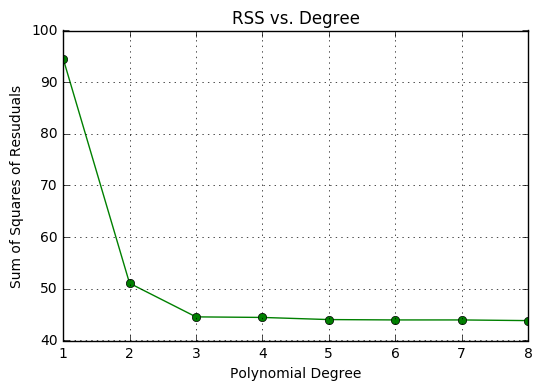

In [5]:
# plot the error change
fig, ax = plt.subplots()
ax.plot(degree_list, error_list, 'go-')
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Sum of Squares of Resuduals')
ax.set_title('RSS vs. Degree')
ax.grid('on')
fig.savefig('./result/rss.pdf')
fig.savefig('./result/rss.png', dpi=300)
plt.show()

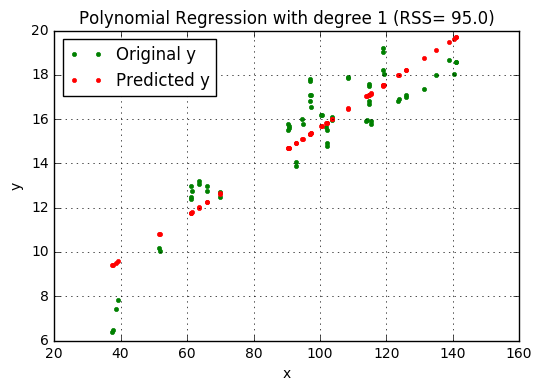

In [6]:
# linear regression
degree = 1
fig = visualize_fitting(x, y, predict_list[degree-1], degree=degree, 
                        error=error_list[degree-1])
fig.savefig('./result/poly_1.pdf')
fig.savefig('./result/poly_1.png', dpi=300)

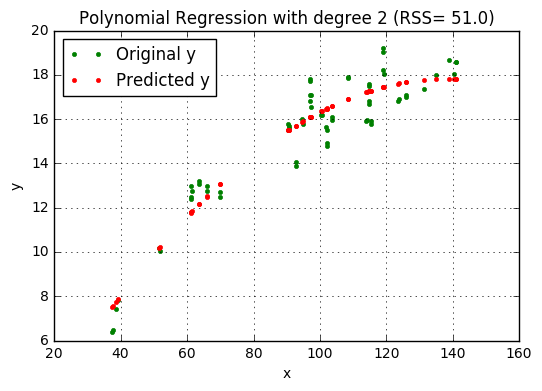

In [7]:
# Polynomial regression with degree 2
degree = 2
fig = visualize_fitting(x, y, predict_list[degree-1], 
                        degree=degree, error=error_list[degree-1])
fig.savefig('./result/poly_2.pdf')
fig.savefig('./result/poly_2.png', dpi=300)

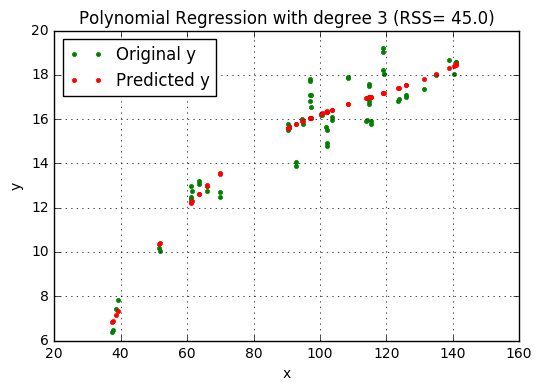

In [8]:
# Polynomial regression with degree 3
degree = 3
fig = visualize_fitting(x, y, predict_list[degree-1], 
                        degree=degree, error=error_list[degree-1])
fig.savefig('./result/poly_3.pdf')
fig.savefig('./result/poly_3.png', dpi=300)

# Part 2. Principal Component Analysis

In [9]:
# load the data set
data2 = pd.read_csv('./data/flowers.csv', header=None).values